In [1]:
import sys
sys.path.append('c:/Users/Jonah/Documents/git/IT3030-Deep-Learning/Project1/core')

In [2]:
from Doodler import gen_standard_cases
from number_config_1 import *
from setup import *

rows=50
cols=50
input_dim=rows*cols
assert LAYER_CONFIG["input"] == input_dim
data, target, labels, img_dim, flat = gen_standard_cases(count=GENERATION["cases"],flat=True,rows=rows,cols=cols, show=False)

In [3]:
def prepare_data():
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train_encoded, y_test_encoded, y_train, y_test = train_test_split(data, target,labels, test_size=0.2, random_state=42)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    return X_train, X_val, X_test, y_train, y_val, y_test, y_train_encoded

In [4]:
network = Network(output_function=Softmax() if LAYER_CONFIG["output_function"] == 'softmax' else Linear())
input = LAYER_CONFIG["input"]
for layer in LAYER_CONFIG["layers"]:
    learning_rate = layer["lrate"] if layer["lrate"] else GLOBAL_CONFIG["lrate"]
    print("Added layer with {} neurons, {} inputs, {} activation function and {} learning rate".format(layer["size"],input,layer["activation"],learning_rate))
    network.add_layer(Layer(num_inputs=input, num_neurons=layer["size"], activation=ACTIVATION_FUNCTIONS[layer["activation"]],learning_rate=learning_rate))
    input = layer["size"]

Added layer with 20 neurons, 2500 inputs, relu activation function and 0.01 learning rate
Added layer with 40 neurons, 20 inputs, relu activation function and 0.01 learning rate
Added layer with 9 neurons, 40 inputs, sigmoid activation function and 0.01 learning rate


In [5]:
test_error, training_errors, validation_errors = train_model(
    dataset=prepare_data,
    network=network,
    num_epochs=GLOBAL_CONFIG["epochs"],
    batch_size=GLOBAL_CONFIG["batch_size"],
    error_function=ERROR_FUNCTIONS[GLOBAL_CONFIG["loss"]],
    # error_function=lambda y_true, y_pred: np.mean(y_true != y_pred)
)

print("Test error: ", test_error)

Test error:  315.0


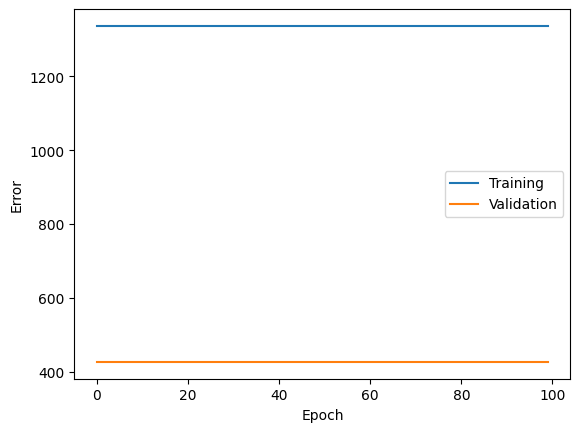

In [6]:
import matplotlib.pyplot as plt
# Plot the accuracy
plt.plot(training_errors)
plt.plot(validation_errors)
plt.xlabel('Epoch')
plt.ylabel('Error')

plt.legend(['Training', 'Validation'])
plt.show()